In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.shape

(1338, 7)

C:\Users\Toshima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


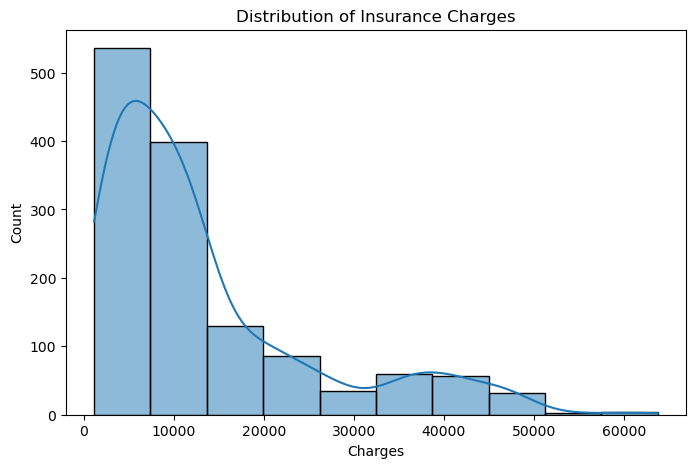

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df["charges"], kde=True, bins=10)
plt.title("Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.show()

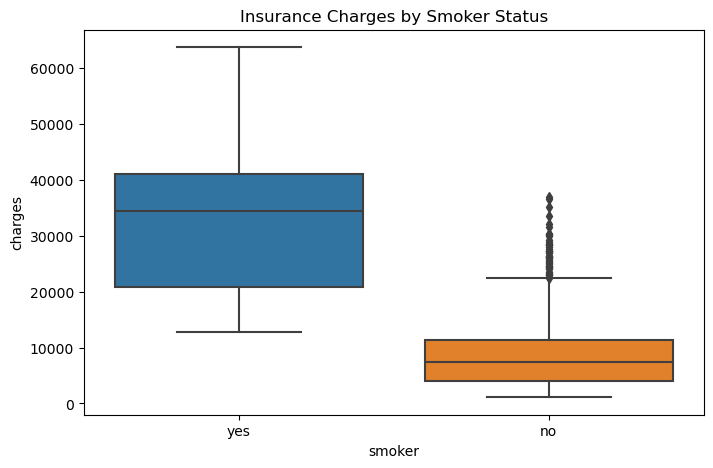

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["smoker"], y=df["charges"])
plt.title("Insurance Charges by Smoker Status")
plt.show()

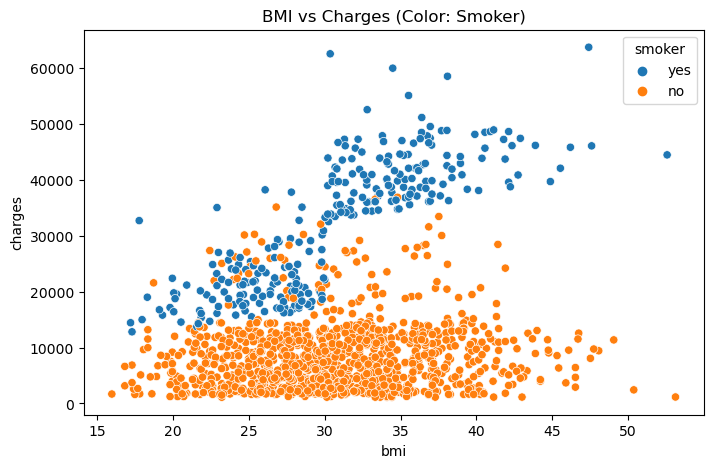

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["bmi"], y=df["charges"], hue=df["smoker"])
plt.title("BMI vs Charges (Color: Smoker)")
plt.show()

C:\Users\Toshima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Toshima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Toshima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Toshima\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

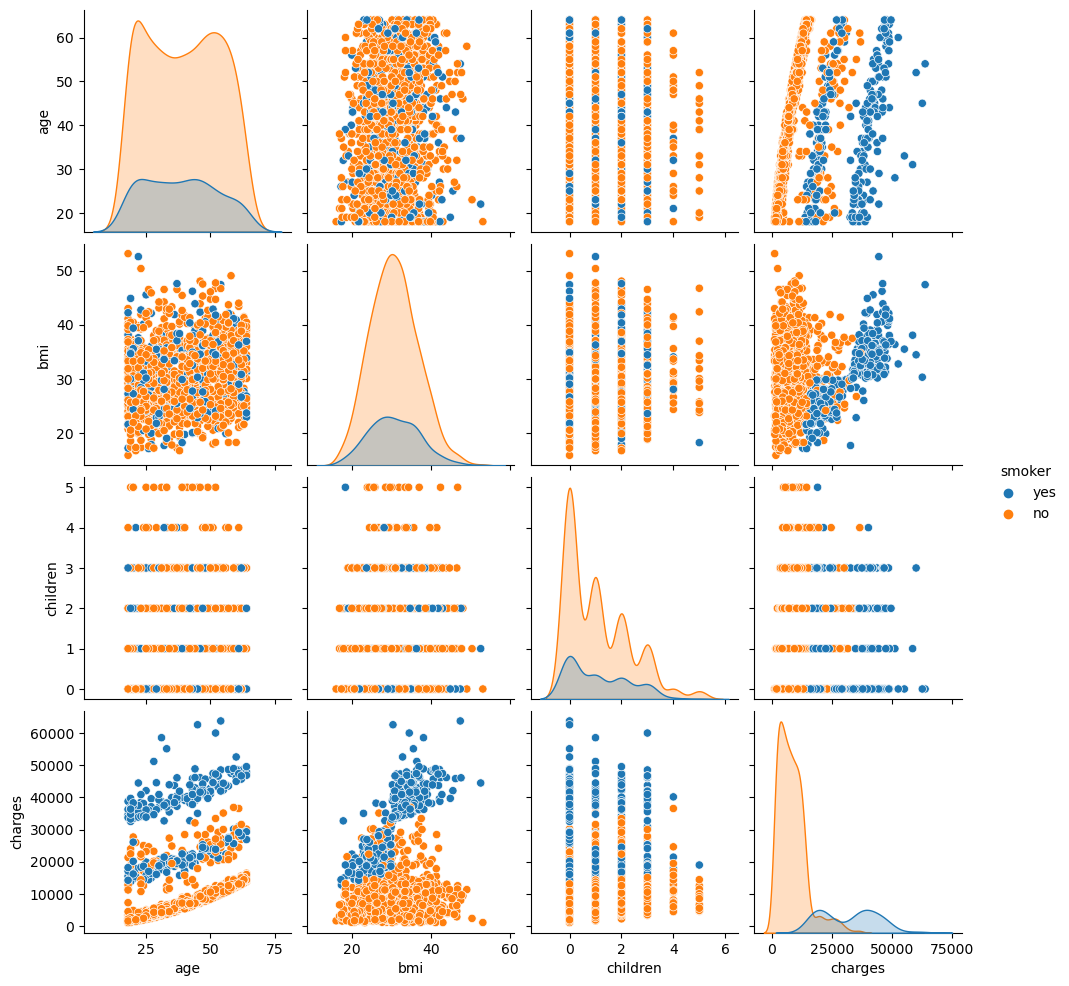

In [11]:
sns.pairplot(df, hue="smoker")
plt.show()

In [12]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding
label_encoder = LabelEncoder()
df["sex"] = label_encoder.fit_transform(df["sex"])

In [14]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [15]:
label_encoder = LabelEncoder()
df["smoker"] = label_encoder.fit_transform(df["smoker"])

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [17]:
df = pd.get_dummies(df, columns=["region"], drop_first=True)

In [18]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Define independent (X) and dependent (y) variables
X = df.drop("charges", axis=1)  # Features
y = df["charges"]  # Target

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (1070, 8)
Testing Set Shape: (268, 8)


In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
# Initialize model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [23]:
model.score(X_test,y_test)

0.7835929767120724

In [24]:
#therefore, we see an accuracy of 78% using the Linear Regression model,
#hence we'll try to use some another algorithm to increase the accuracy.

In [25]:
from sklearn.ensemble import RandomForestRegressor

In [26]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=150, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [27]:
rf_model.score(X_test,y_test)

0.8634436916150404

In [28]:
#therefore, we see an accuracy of 86% using the Random Forest model

In [29]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: streamlit in c:\users\toshima\anaconda3\lib\site-packages (1.30.0)



In [32]:
import joblib
joblib.dump(rf_model, 'health_insurance_model.pkl')


['health_insurance_model.pkl']